In [1]:
# For drawing the MNIST digits as well as plots to help us evaluate performance we
# will make extensive use of matplotlib
from matplotlib import pyplot as plt

# All of the Keras datasets are in keras.datasets
from keras.datasets import mnist

# Keras has already split the data into training and test data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Training images is a list of 60,000 2D lists.
# Each 2D list is 28 by 28—the size of the MNIST pixel data.
# Each item in the 2D array is an integer from 0 to 255 representing its grayscale
# intensity where 0 means white, 255 means black.
print(len(training_images), training_images[0].shape)

# training_labels are a value between 0 and 9 indicating which digit is represented.
# The first item in the training data is a 5
print(len(training_labels), training_labels[0])


Using TensorFlow backend.


60000 (28, 28)
60000 5


In [2]:
from keras.utils import to_categorical

# Preparing the dataset
# Setup train and test splits
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


# 28 x 28 = 784, because that's the dimensions of the MNIST data.
image_size = 784

# Reshaping the training_images and test_images to lists of vectors with length 784
# instead of lists of 2D arrays. Same for the test_images
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

In [3]:
# Create 1-hot encoded vectors using to_categorical
num_classes = 10 # Because it's how many digits we have (0-9) 

# to_categorical takes a list of integers (our labels) and makes them into 1-hot vectors
training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [13]:
from keras.models import Sequential
from keras.layers import Dense

# Sequential models are a series of layers applied linearly.
model = Sequential()

# The first layer must specify it's input_shape.
# This is how the first two layers are added, the input layer and the hidden layer.

model.add(Dense(units=512, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=32, activation='sigmoid'))

# This is how the output layer gets added, the 'softmax' activation function ensures
# that the sum of the values in the output nodes is 1. Softmax is very
# common in classification networks. 
model.add(Dense(units=num_classes, activation='softmax'))

# This function provides useful text data for our network
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_11 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                330       
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [14]:
# sgd stands for stochastic gradient descent.
# categorical_crossentropy is a common loss function used for categorical classification.
# accuracy is the percent of predictions that were correct.
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

# The network will make predictions for 128 flattened images per correction.
# It will make a prediction on each item in the training set 5 times (5 epochs)
# And 10% of the data will be used as validation data.
history = model.fit(training_data, training_labels, batch_size=64, epochs=20, verbose=True, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 5s 84us/step - loss: 2.1454 - accuracy: 0.4464 - val_loss: 1.9290 - val_accuracy: 0.6983
Epoch 2/20
54000/54000 [==============================] - 4s 82us/step - loss: 1.6889 - accuracy: 0.7031 - val_loss: 1.4158 - val_accuracy: 0.7813
Epoch 3/20
54000/54000 [==============================] - 4s 83us/step - loss: 1.2411 - accuracy: 0.7676 - val_loss: 1.0207 - val_accuracy: 0.8290
Epoch 4/20
54000/54000 [==============================] - 6s 110us/step - loss: 0.9309 - accuracy: 0.8181 - val_loss: 0.7649 - val_accuracy: 0.8717
Epoch 5/20
54000/54000 [==============================] - 7s 139us/step - loss: 0.7298 - accuracy: 0.8543 - val_loss: 0.5989 - val_accuracy: 0.8925
Epoch 6/20
54000/54000 [==============================] - 7s 138us/step - loss: 0.5948 - accuracy: 0.8753 - val_loss: 0.4859 - val_accuracy: 0.9103
Epoch 7/20
54000/54000 [==============================] - 7s 130us

10000/10000 [==============================] - 1s 61us/step


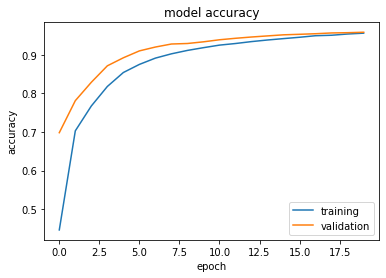

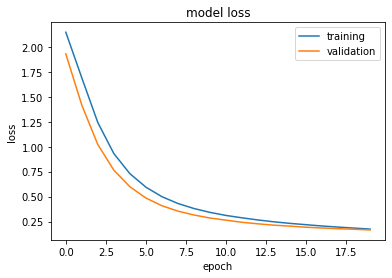

Test loss: 0.191
Test accuracy: 0.95


In [15]:
loss, accuracy  = model.evaluate(test_data, test_labels, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Build a network with at least 3 hidden layers that achieves better than 92% accuracy on validation and test data. You may need to train for more than 10 epochs to achieve this result.

* Compare your best results to the result you got in part one:
  * Which network achieved the best accuracy on test data after training?
     * The network with three layers had a test accuracy of 95% and a validation accuracy of 95.9% and performed better than the model from question 1
  * Did the networks train for a similar number of epochs?
     * The model with three layers required at least three times the number of epochs to be equivalent to the network in problem 1
